In [1]:
import pandas as pd
import numpy as np
import re

In [35]:
from gensim import models
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans

from sklearn.manifold import TSNE
from sklearn.metrics import rand_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score


import pickle
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk import pos_tag

# ! pip install stopwords
# ! pip install stop_words
# ! pip install gensim
# ! pip install python-Levenshtein
# ! pip install pickle-mixin

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def analysis(labels, predictions):
    predictions = np.array(predictions)
    predictions2 = ~ np.array(predictions) + 2
    
    print("Accuracy: \n", max(accuracy_score(labels, predictions), accuracy_score(labels, predictions2)))
    print("Rand Score: \n", max(rand_score(labels, predictions), rand_score(labels, predictions2)))
    print("Adjusted Rand Score: \n", max(adjusted_rand_score(labels, predictions), adjusted_rand_score(labels, predictions2)))
    print("Adjusted Mutual Info: \n", max(adjusted_mutual_info_score(labels, predictions), adjusted_mutual_info_score(labels, predictions2)))
    print("Homogeneity Score: \n", max(homogeneity_score(labels, predictions), homogeneity_score(labels, predictions2)))
    print("Completeness Score: \n", max(completeness_score(labels, predictions), completeness_score(labels, predictions2)))
    print("V Measure Score Score: \n", max(v_measure_score(labels, predictions), v_measure_score(labels, predictions2)))


### Read Data

In [5]:
data_set = pd.read_csv('dataset.csv')[:100]

X = data_set['comment']
Y = data_set['sentiment']


# label binarization
label_binarizer = LabelBinarizer()
Y = label_binarizer.fit_transform(Y)
Y = np.ravel(Y)

### Pre-processing functions

In [6]:
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

def lemmatize(text):
    list_pos = 0
    cleaned_str = ''
    lmtzr = WordNetLemmatizer()
    
    tagged_words = pos_tag(text)
    for word in tagged_words:
        if 'v' in word[1].lower():
            lemma = lmtzr.lemmatize(word[0], pos='v')
        else:
            lemma = lmtzr.lemmatize(word[0], pos='n')
        if list_pos == 0:
            cleaned_str = lemma
        else:
            cleaned_str = cleaned_str + ' ' + lemma
        list_pos += 1
    return cleaned_str

def clean(text):
    text = str(text).lower() #lowercase
    text = re.sub(r'\bid\b', 'i would', text) #start abbreviation
    text = re.sub(r'\bive\b', 'i have', text)
    text = re.sub(r'\bim\b', 'i am', text)
    text = re.sub(r'\bcant\b', 'can not', text)
    text = re.sub(r'\bdont\b', 'do not', text)
    text = re.sub(r'\bwont\b', 'will not', text)
    text = re.sub(r'\bthats\b', 'that is', text) #end abbreviation
    text = re.sub('[0-9]+', '', text) # delete numbers
    text = re.sub(r'[^\x00-\x7F]+',' ', text) #remove non-ascii
    text = re.sub('[<>{}=~.,،:\\!?\\-()\\[\\]#/@"]+|[_x000D_]+|\u200c+|[\r\n]', ' ', text) #remove punctuations
    word_list = nltk.word_tokenize(text)
    text = lemmatize(word_list)
    word_list = text.split()
    word_list = list(filter(lambda word: word not in stop_words, word_list)) # delete stopwords
    word_list = [w for w in word_list if len(w)>1] # delete len = 1
    return word_list


# BOW

In [7]:
MAX_BOW_SIZE = 1000
count_vectorizer = CountVectorizer(tokenizer=lambda text: clean(text), max_features=MAX_BOW_SIZE)
cv_X = count_vectorizer.fit_transform(X)
cv_X_embedded = TSNE(n_components=2).fit_transform(cv_X)

## Kmeans: 

#### 2 Cluster:

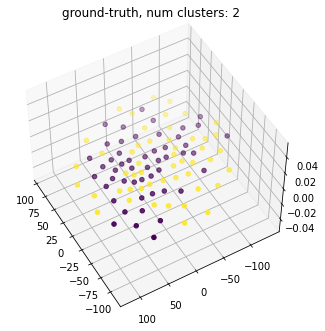

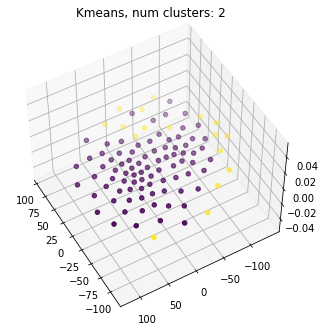

In [8]:
number_of_clusters = 2
model = KMeans(n_clusters=number_of_clusters)
model.fit(cv_X)
labels = model.labels_

figures = {1: 'ground-truth', 2:'Kmeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

In [9]:
analysis(Y, labels)

Accuracy: 
 0.53
Rand Score: 
 0.49676767676767675
Adjusted Rand Score: 
 -0.0021130566583634374
Adjusted Mutual Info: 
 -0.003442849034428775
Homogeneity Score: 
 0.004621325479109986
Completeness Score: 
 0.0070264435176123526
V Measure Score Score: 
 0.005575571161242393


#### 3 Cluster:

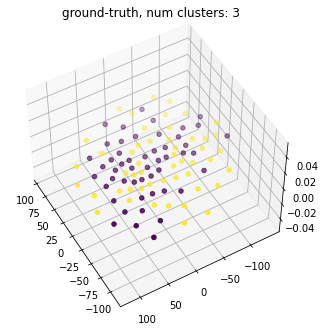

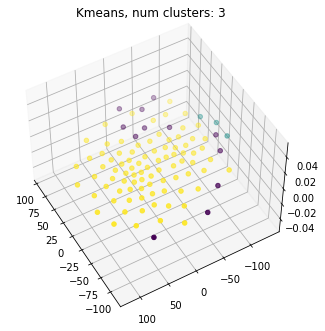

In [10]:
number_of_clusters = 3
model = KMeans(n_clusters=number_of_clusters)
model.fit(cv_X)
labels = model.labels_

figures = {1: 'ground-truth', 2:'Kmeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

#### 4 Cluster:

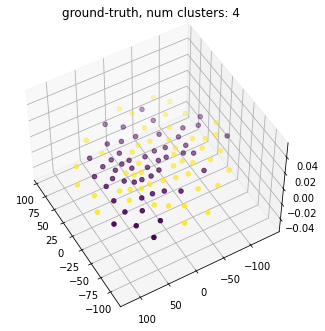

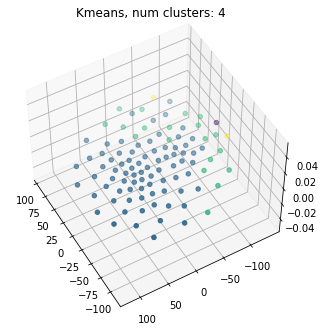

In [11]:
number_of_clusters = 4
model = KMeans(n_clusters=number_of_clusters)
model.fit(cv_X)
labels = model.labels_

figures = {1: 'ground-truth', 2:'Kmeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

## Gaussain Mixture: 

#### 2 Cluster:

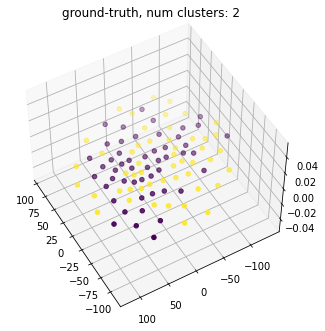

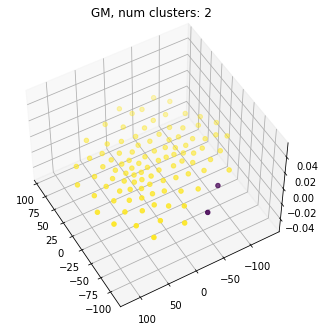

In [12]:
number_of_clusters = 2
model = GaussianMixture(n_components=number_of_clusters)
model.fit(cv_X.toarray())
labels = model.predict(cv_X.toarray())

figures = {1: 'ground-truth', 2:'GM'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

In [13]:
analysis(Y, labels)

Accuracy: 
 0.52
Rand Score: 
 0.49575757575757573
Adjusted Rand Score: 
 0.000808721249959564
Adjusted Mutual Info: 
 0.018281020660329432
Homogeneity Score: 
 0.02029444800061291
Completeness Score: 
 0.14348395188467494
V Measure Score Score: 
 0.03555936072748941


#### 3 Cluster:

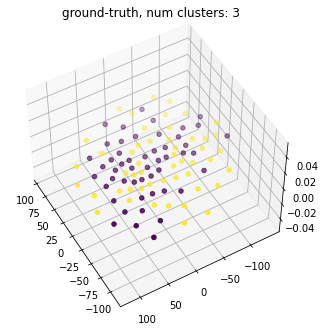

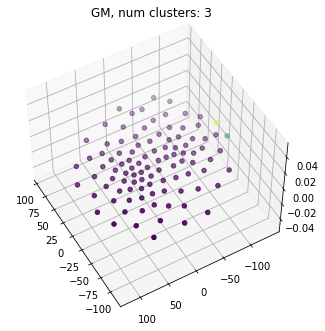

In [14]:
number_of_clusters = 3
model = GaussianMixture(n_components=number_of_clusters)
model.fit(cv_X.toarray())
labels = model.predict(cv_X.toarray())

figures = {1: 'ground-truth', 2:'GM'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

#### 4 Cluster:

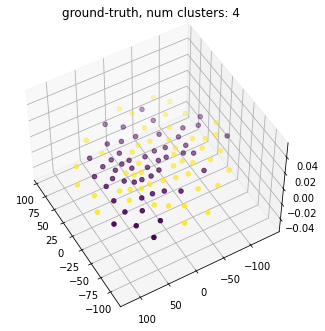

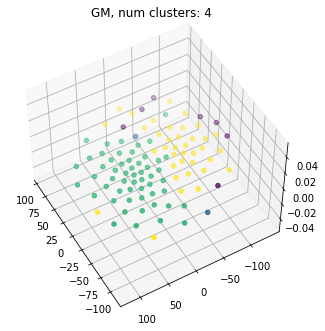

In [15]:
number_of_clusters = 4
model = GaussianMixture(n_components=number_of_clusters)
model.fit(cv_X.toarray())
labels = model.predict(cv_X.toarray())

figures = {1: 'ground-truth', 2:'GM'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

## MiniBatchKMeans: 

#### 2 Cluster:

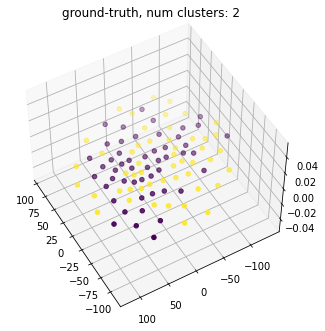

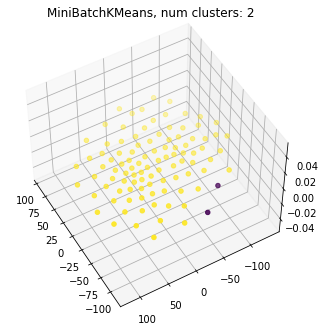

In [16]:
number_of_clusters = 2
model = MiniBatchKMeans(n_clusters=number_of_clusters)
model.fit(cv_X)
labels = model.labels_

figures = {1: 'ground-truth', 2:'MiniBatchKMeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

In [17]:
analysis(Y, labels)

Accuracy: 
 0.52
Rand Score: 
 0.49575757575757573
Adjusted Rand Score: 
 0.000808721249959564
Adjusted Mutual Info: 
 0.018281020660329432
Homogeneity Score: 
 0.02029444800061291
Completeness Score: 
 0.14348395188467494
V Measure Score Score: 
 0.03555936072748941


#### 3 Cluster:

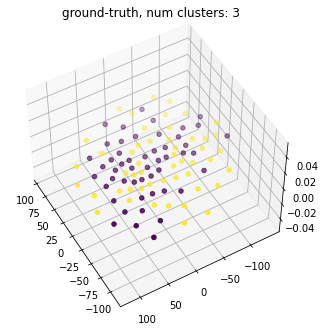

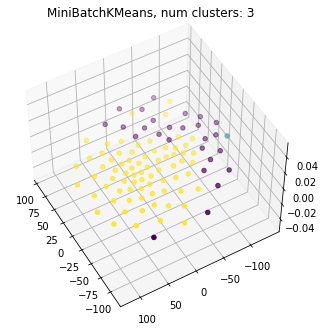

In [18]:
number_of_clusters = 3
model = MiniBatchKMeans(n_clusters=number_of_clusters)
model.fit(cv_X)
labels = model.labels_

figures = {1: 'ground-truth', 2:'MiniBatchKMeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

#### 4 Cluster:

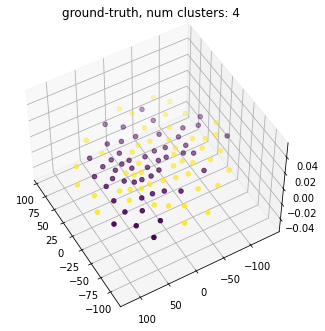

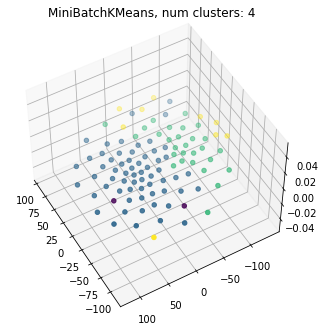

In [19]:
number_of_clusters = 4
model = MiniBatchKMeans(n_clusters=number_of_clusters)
model.fit(cv_X)
labels = model.labels_

figures = {1: 'ground-truth', 2:'MiniBatchKMeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(cv_X_embedded[:, 0], cv_X_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

# W2V

In [20]:
corpus_text = '\n'.join(X)
sentences = corpus_text.split('\n')
sentences = [clean(line) for line in sentences]

model = Word2Vec(sentences, window=5, min_count=3, workers=4)
vectors = model.wv

w2v_sentences = []
for index in range(len(sentences)):
    temp = []
    for word in sentences[index]:
        try:
            temp.append(vectors[word])
        except:
            pass
    w2v_sentences.append(np.mean(temp, axis=0))

w2v_sentences_embedded = TSNE(n_components=2).fit_transform(w2v_sentences)

## Kmeans: 

#### 2 Cluster:

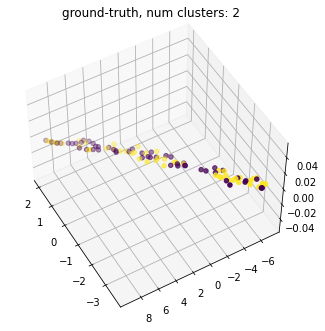

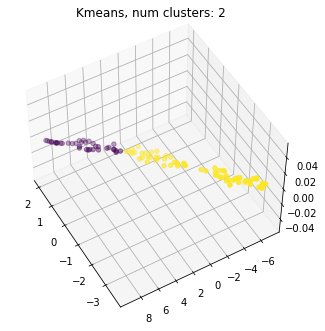

In [21]:
number_of_clusters = 2
model = KMeans(n_clusters=number_of_clusters)
model.fit(w2v_sentences)
labels = model.labels_

figures = {1: 'ground-truth', 2:'Kmeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

In [22]:
analysis(Y, labels)

Accuracy: 
 0.55
Rand Score: 
 0.5
Adjusted Rand Score: 
 0.0005873499504423479
Adjusted Mutual Info: 
 0.0004333705665455986
Homogeneity Score: 
 0.007754416307993635
Completeness Score: 
 0.008156772842753646
V Measure Score Score: 
 0.007950507250361968


#### 3 Cluster:

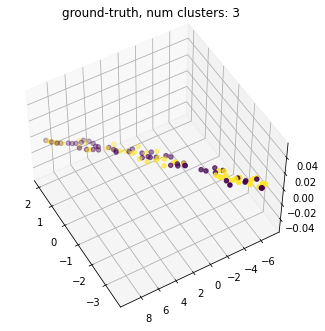

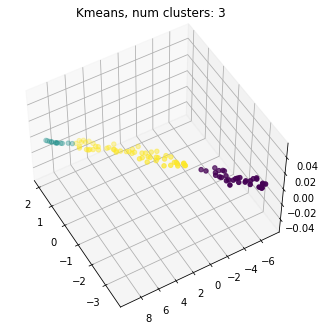

In [23]:
number_of_clusters = 3
model = KMeans(n_clusters=number_of_clusters)
model.fit(w2v_sentences)
labels = model.labels_

figures = {1: 'ground-truth', 2:'Kmeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

#### 4 Cluster:

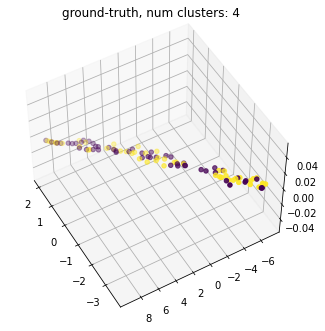

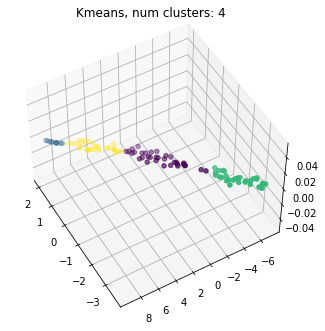

In [24]:
number_of_clusters = 4
model = KMeans(n_clusters=number_of_clusters)
model.fit(w2v_sentences)
labels = model.labels_

figures = {1: 'ground-truth', 2:'Kmeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

## Gaussain Mixture: 

#### 2 Cluster:

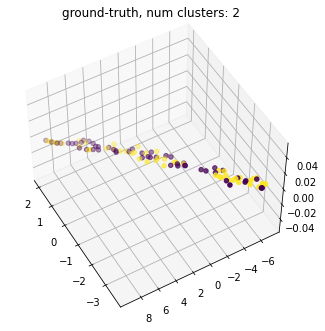

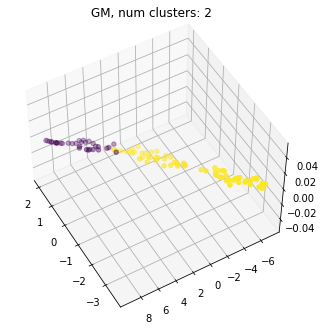

In [27]:
number_of_clusters = 2
model = GaussianMixture(n_components=number_of_clusters)
model.fit(w2v_sentences)
labels = model.predict(w2v_sentences)

figures = {1: 'ground-truth', 2:'GM'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

In [28]:
analysis(Y, labels)

Accuracy: 
 0.55
Rand Score: 
 0.5
Adjusted Rand Score: 
 0.001076281447598547
Adjusted Mutual Info: 
 0.0008798152781766581
Homogeneity Score: 
 0.00817995638651369
Completeness Score: 
 0.00894056246478212
V Measure Score Score: 
 0.008543363862746928


#### 3 Cluster:

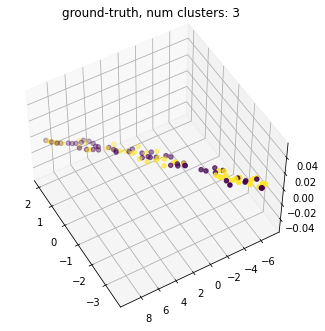

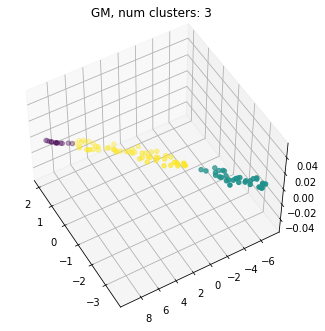

In [29]:
number_of_clusters = 3
model = GaussianMixture(n_components=number_of_clusters)
model.fit(w2v_sentences)
labels = model.predict(w2v_sentences)

figures = {1: 'ground-truth', 2:'GM'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

#### 4 Cluster:

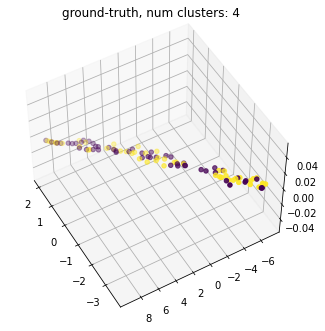

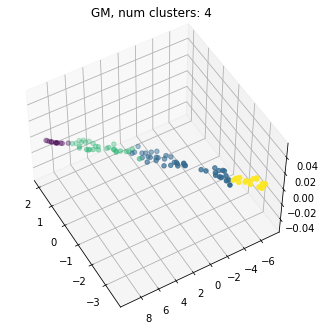

In [30]:
number_of_clusters = 4
model = GaussianMixture(n_components=number_of_clusters)
model.fit(w2v_sentences)
labels = model.predict(w2v_sentences)

figures = {1: 'ground-truth', 2:'GM'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

## MiniBatchKMeans: 

#### 2 Cluster:

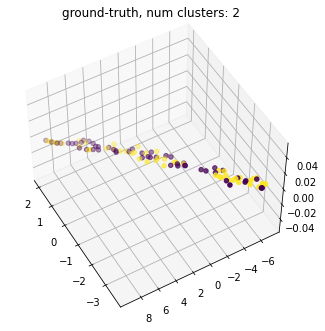

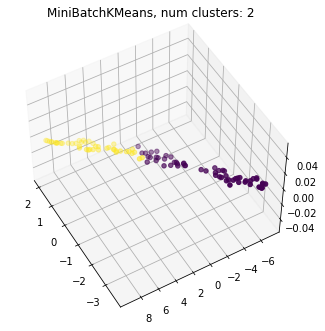

In [31]:
number_of_clusters = 2
model = MiniBatchKMeans(n_clusters=number_of_clusters)
model.fit(w2v_sentences)
labels = model.labels_

figures = {1: 'ground-truth', 2:'MiniBatchKMeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

In [32]:
analysis(Y, labels)

Accuracy: 
 0.54
Rand Score: 
 0.49818181818181817
Adjusted Rand Score: 
 -0.003591309032142216
Adjusted Mutual Info: 
 -0.002669917868380409
Homogeneity Score: 
 0.004689455997121293
Completeness Score: 
 0.004738798637365817
V Measure Score Score: 
 0.00471399820023088


#### 3 Cluster:

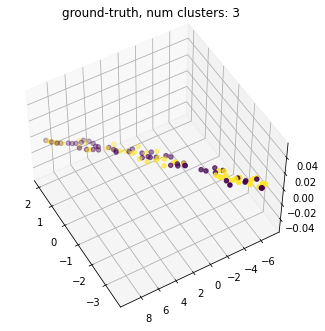

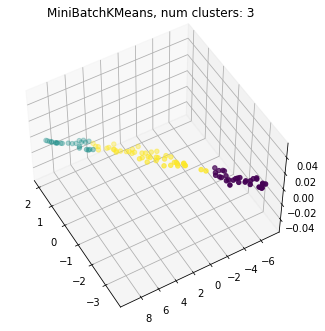

In [33]:
number_of_clusters = 3
model = MiniBatchKMeans(n_clusters=number_of_clusters)
model.fit(w2v_sentences)
labels = model.labels_

figures = {1: 'ground-truth', 2:'MiniBatchKMeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))

#### 4 Cluster:

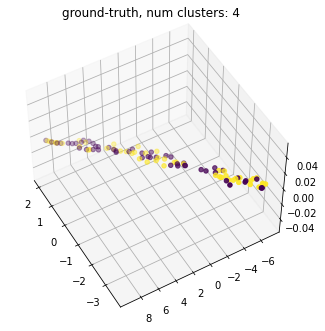

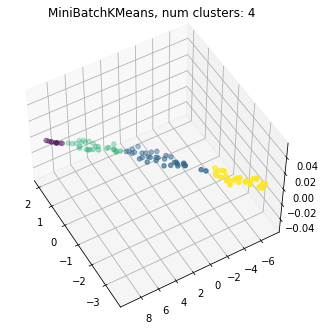

In [34]:
number_of_clusters = 4
model = MiniBatchKMeans(n_clusters=number_of_clusters)
model.fit(w2v_sentences)
labels = model.labels_

figures = {1: 'ground-truth', 2:'MiniBatchKMeans'}
labels_dict = {1: Y, 2:labels}
for n in figures.keys():
    fig = plt.figure(num = n, figsize = (4, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
    ax.scatter(w2v_sentences_embedded[:, 0], w2v_sentences_embedded[:, 1], c = labels_dict[n].astype(float))
    ax.set_title(figures[n] + ", num clusters: " + str(number_of_clusters))